In [2]:
import collections as ct
import graphviz as gv

# Algoritmo de menor distância

In [3]:
INF=999999999999 # valor arbitrário para infinito

def shortest_dist(graph, final_node):
    dist=[0]*len(graph) # setando vetor de distância
    for u in reversed(sorted(graph.keys())):
        dist[u]=INF # distância infinita caso não conhecida
        for node, weight in graph[u]:
            print(u, '--', node, '=', weight)
            dist[u]=min(dist[u], weight+dist[node]) # pegamos a menor distância dentre a menor conhecida
                                                    # e a nova explorada

    return dist[0] # retornamos menor distância do início 

# Implementando lista de adjagência

In [4]:
graph = ct.defaultdict(list)

# implementamos a lista de adjacência por meio de vetores
# para cada vetor temos suas conexões, primeiro valor é qual ele se conecta e segundo o peso dessa conexão
graph[0]=[(1,1), (2,2), (3,5)]
graph[1]=[(4,4), (5,11)]
graph[2]=[(4,9), (5,5), (6,16)]
graph[3]=[(6,2)]
graph[4]=[(7,18)]
graph[5]=[(7,13)]
graph[6]=[(7,2)]


print(shortest_dist(graph, graph[-1]))

6 -- 7 = 2
5 -- 7 = 13
4 -- 7 = 18
3 -- 6 = 2
2 -- 4 = 9
2 -- 5 = 5
2 -- 6 = 16
1 -- 4 = 4
1 -- 5 = 11
0 -- 1 = 1
0 -- 2 = 2
0 -- 3 = 5
9


In [5]:
INF=999999999999

dist=[0]*len(graph)
path=[0]*len(graph)

for u in reversed(sorted(graph.keys())):
    dist[u]=INF
    for node, weight in graph[u]:
        # print(u, '--', node, '=', weight)
        if (dist[u] > weight+dist[node]):
            # print('u = ', u, ' node = ', node, ' weight = ', weight, ' dist[u] = ', dist[u], ' dist[node] = ', dist[node])
            dist[u]=weight+dist[node]
            path[u]=node

del graph[-1]
# identificar o menor caminho para plotagem
print('PATH:\n0', end='')
i = 0
graph[7]=[]
path_list = []
path_list.append(0)
while (i != 7):
    i = path[i]
    path_list.append(i)
    print(' -- ', i, end='')
print()

PATH:
0 --  3 --  6 --  7


In [19]:
dot = gv.Digraph(comment='Multistage Graph')
cont = 0
for nodes in graph:
    temp = []
    temp.append(nodes)
    print(nodes)
    if(set(temp).intersection(path_list)):
        dot.node(str(nodes), str(nodes), color='blue')
    else:
        dot.node(str(nodes), str(nodes), color='red')
    cont+=1
    for u,v in graph[nodes]:
        if(nodes in path_list and u in path_list):
            dot.edge(str(nodes), str(u), label=str(v), color='blue')
        else:
            dot.edge(str(nodes), str(u), label=str(v))

0
1
2
3
4
5
6
7


In [20]:
print(dot.source)

// Multistage Graph
digraph {
	0 [label=0 color=blue]
	0 -> 1 [label=1]
	0 -> 2 [label=2]
	0 -> 3 [label=5 color=blue]
	1 [label=1 color=red]
	1 -> 4 [label=4]
	1 -> 5 [label=11]
	2 [label=2 color=red]
	2 -> 4 [label=9]
	2 -> 5 [label=5]
	2 -> 6 [label=16]
	3 [label=3 color=blue]
	3 -> 6 [label=2 color=blue]
	4 [label=4 color=red]
	4 -> 7 [label=18]
	5 [label=5 color=red]
	5 -> 7 [label=13]
	6 [label=6 color=blue]
	6 -> 7 [label=2 color=blue]
	7 [label=7 color=blue]
}


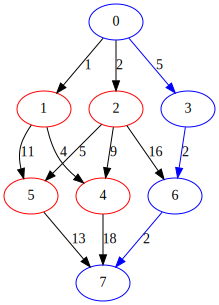

In [21]:
dot